# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# About the data and Test-train split

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full,X_test ,Y_train_full ,Y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid ,Y_train ,Y_valid = train_test_split(X_train_full, Y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_valid = scalar.transform(X_valid)
X_test = scalar.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "relu",input_shape= X_train.shape[1:]),
    keras.layers.Dense(30,activation = "relu"),
    keras.layers.Dense(1)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(lr = 1e-3), metrics = ['mae'])

In [16]:
model_history = model.fit(X_train, Y_train, epochs = 20, validation_data = (X_valid, Y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [17]:
mae_test = model.evaluate(X_test, Y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3596 - mae: 0.4269


In [18]:
model_history.history

{'loss': [0.3948921859264374,
  0.3922426700592041,
  0.38980168104171753,
  0.3872992992401123,
  0.3851175904273987,
  0.3828714191913605,
  0.3807542324066162,
  0.3787873089313507,
  0.37684252858161926,
  0.37485161423683167,
  0.3732492923736572,
  0.37154120206832886,
  0.3699617087841034,
  0.36844807863235474,
  0.3671077489852905,
  0.36586400866508484,
  0.364767462015152,
  0.36347660422325134,
  0.36217090487480164,
  0.3612859845161438],
 'mae': [0.448872447013855,
  0.4469223618507385,
  0.4460664689540863,
  0.4439034163951874,
  0.4425695538520813,
  0.4414599537849426,
  0.4398252069950104,
  0.43846991658210754,
  0.43753182888031006,
  0.4359447658061981,
  0.43472516536712646,
  0.43356847763061523,
  0.43265366554260254,
  0.43151575326919556,
  0.43066665530204773,
  0.43046438694000244,
  0.42939263582229614,
  0.42837896943092346,
  0.42722663283348083,
  0.42688435316085815],
 'val_loss': [0.3695237636566162,
  0.3698018789291382,
  0.3646637797355652,
  0.363

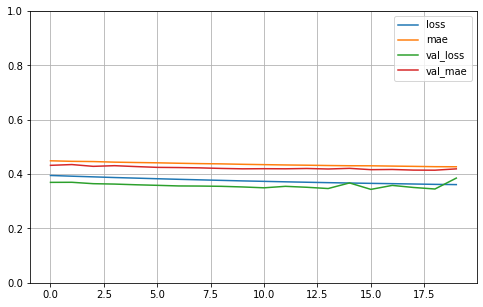

In [19]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
X_new = X_test[:3]

In [21]:
Y_pred = model.predict(X_new)
print(Y_pred)
print(Y_test[:3])

[[0.6071852]
 [1.8601747]
 [3.7925048]]
[0.477   0.458   5.00001]


# Using Functional APIs for complex architecture

In [22]:
del model

In [23]:
keras.backend.clear_session()

In [23]:
#    |
#  output
#    |
#  Concat<------\
#    |           \
#  Hidden 2       \
#    |     \       | wide
#  Hidden 1/Deep   /
#    |            /
#  Input---------/
    

In [24]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

In [25]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [26]:
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(lr = 1e-3), metrics = ['mae'])

In [32]:
model_history = model.fit(X_train, Y_train, epochs = 20, validation_data = (X_valid, Y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4060 - mae: 0.4581 - val_loss: 0.4090 - val_mae: 0.4439
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4029 - mae: 0.4550 - val_loss: 0.4422 - val_mae: 0.4480
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4000 - mae: 0.4541 - val_loss: 0.4263 - val_mae: 0.4427
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3972 - mae: 0.4519 - val_loss: 0.4139 - val_mae: 0.4432
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3948 - mae: 0.4503 - val_loss: 0.4007 - val_mae: 0.4395
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3923 - mae: 0.4487 - val_loss: 0.4213 - val_mae: 0.4389
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3903 - mae: 0.4471 - val_loss: 0.3999 - val_mae: 0.4375
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [33]:
mae_test = model.evaluate(X_test, Y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3681 - mae: 0.4335


In [34]:
print(mae_test)

[0.36809736490249634, 0.433473140001297]


In [35]:
model_history.history

{'loss': [0.4059949517250061,
  0.40294966101646423,
  0.40002724528312683,
  0.39718419313430786,
  0.39482569694519043,
  0.39234572649002075,
  0.3902866840362549,
  0.3884372413158417,
  0.3864903748035431,
  0.384766161441803,
  0.3833538889884949,
  0.38152867555618286,
  0.38031384348869324,
  0.3788314759731293,
  0.3774601221084595,
  0.37627825140953064,
  0.37505555152893066,
  0.3743847608566284,
  0.37286028265953064,
  0.371969074010849],
 'mae': [0.4580843150615692,
  0.4550435245037079,
  0.4541078209877014,
  0.45185327529907227,
  0.4502567648887634,
  0.4486534595489502,
  0.447109580039978,
  0.4459647238254547,
  0.444699227809906,
  0.44359955191612244,
  0.4420863389968872,
  0.4410480856895447,
  0.44025179743766785,
  0.4390101730823517,
  0.4385252594947815,
  0.4377392530441284,
  0.4367212653160095,
  0.43629589676856995,
  0.4349123239517212,
  0.4344528019428253],
 'val_loss': [0.40900447964668274,
  0.44221410155296326,
  0.4263044595718384,
  0.413890093

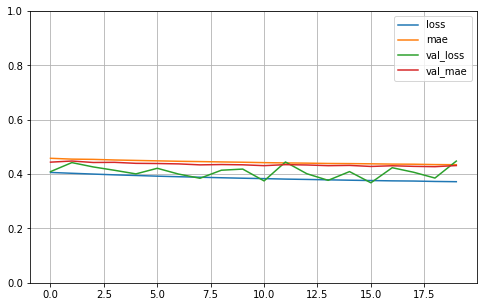

In [36]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Saving and Restoring

In [37]:
model.save("func_model.h5")

In [38]:
%pwd

'C:\\Users\\Rahul Kapoor\\OneDrive\\Desktop\\Udemy\\StartTech'

In [44]:
del model

In [40]:
keras.backend.clear_session()

In [41]:
model = keras.models.load_model("func_model.h5")

In [42]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [43]:
Y_pred = model.predict(X_new)
print(Y_pred)

[[0.7934967]
 [1.7507625]
 [3.7681181]]


# Using Callbacks using Training
<p>callbacks:<br>callbacks can act as a saving checkpoint at each epoch for calling a model</p>

In [72]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "relu",input_shape= X_train.shape[1:]),
    keras.layers.Dense(30,activation = "relu"),
    keras.layers.Dense(1)
])

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

In [76]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")
# Since i neaad all the 10 epoch files and not the just last one, {epoch:02d} is written. Thus generating 10 different files for each epoch

In [77]:
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_valid,Y_valid), callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - ETA: 0s - loss: 0.659 - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0

In [78]:
#del model
keras.backend.clear_session()

In [79]:
model = keras.models.load_model("Model-10.h5")

In [80]:
mse_test = model.evaluate(X_test, Y_test)

162/162 [==============================] - 0s 586us/step - loss: 0.4382


In [81]:
mse_test

0.43822863698005676

<h1>Best Model</h1>

In [82]:
del model
keras.backend.clear_session()

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "relu",input_shape= X_train.shape[1:]),
    keras.layers.Dense(30,activation = "relu"),
    keras.layers.Dense(1)
])

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

In [86]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model_best.h5" , save_best_only=True)

In [87]:
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_valid,Y_valid), callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/10
363/363 [==============================] - 0s 955us/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4431 - val_loss: 0.42

In [88]:
model = keras.models.load_model("Model_best.h5")

In [89]:
mse_test = model.evaluate(X_test, Y_test)

162/162 [==============================] - 0s 622us/step - loss: 0.4366


In [90]:
mse_test

0.43662846088409424

# Early Stopping

In [98]:
del model
keras.backend.clear_session()

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "relu",input_shape= X_train.shape[1:]),
    keras.layers.Dense(30,activation = "relu"),
    keras.layers.Dense(1)
])

In [100]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

In [102]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model_early.h5" , save_best_only=True)

In [103]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# patience : Number of epochs with no improvement after which training will be stopped

In [104]:
history = model.fit(X_train, Y_train, epochs = 200, validation_data = (X_valid,Y_valid), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 1.5112 - val_loss: 0.8699
Epoch 2/200
363/363 [==============================] - ETA: 0s - loss: 0.670 - 0s 1ms/step - loss: 0.6710 - val_loss: 0.6277
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6166 - val_loss: 0.5812
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5772 - val_loss: 0.5454
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5462 - val_loss: 0.5101
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5188 - val_loss: 0.4870
Epoch 7/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4975 - val_loss: 0.4705
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4795 - val_loss: 0.4448
Epoch 9/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4640 - val_loss: 0.4298
Epoch 10/200
363/363 [==============================] - 1s 2ms/step

In [105]:
model = keras.models.load_model("Model_early.h5")

In [106]:
mse_test = model.evaluate(X_test, Y_test)

162/162 [==============================] - 0s 685us/step - loss: 0.3678
